In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial
from sklearn.model_selection import train_test_split

## Import the CIFAR10 Dataset from Keras

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


## Taking a look at the data set

In [5]:
X_train_full.shape

(50000, 32, 32, 3)

In [11]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

Label	Description
0	airplane
1	automobile
2	bird
3	cat
4	deer
5	dog
6	frog
7	horse
8	ship
9	truck


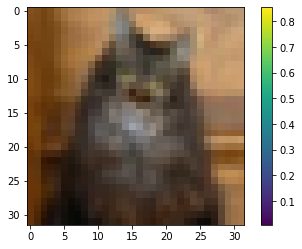

In [12]:
plt.figure()
plt.imshow(X_train_full[26])
plt.colorbar()

## Scaling the data and spliting into validation and training data

In [3]:
X_train_full=X_train_full.reshape(X_train_full.shape[0], X_train_full.shape[1], X_train_full.shape[2], 3)
X_train_full=X_train_full / 255.0
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 3)
X_test=X_test / 255.0

In [6]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

## First Architecture build of the DNN

In [20]:
#using the partial function to build a layer that can be reused

DenseLayer = partial(keras.layers.Dense,
                     activation = "ELU",
                     kernel_initializer = "he_normal"
                     )

In [21]:
model = keras.models.Sequential([
                                  keras.layers.Flatten(input_shape = [32,32,3]),
                                  keras.layers.BatchNormalization(),
                                  DenseLayer(100),
                                  keras.layers.BatchNormalization(),
                                  DenseLayer(100),
                                  keras.layers.BatchNormalization(),
                                  DenseLayer(100),
                                  keras.layers.BatchNormalization(),
                                  DenseLayer(100),
                                  keras.layers.BatchNormalization(),
                                  DenseLayer(100),
                                  keras.layers.BatchNormalization(),
                                  DenseLayer(100),
                                  keras.layers.BatchNormalization(),
                                  DenseLayer(100),
                                  keras.layers.BatchNormalization(),
                                  DenseLayer(100),
                                  keras.layers.BatchNormalization(),
                                  DenseLayer(100),
                                  keras.layers.BatchNormalization(),
                                  DenseLayer(100),
                                  keras.layers.BatchNormalization(),
                                  DenseLayer(100),
                                  keras.layers.BatchNormalization(),
                                  DenseLayer(100),
                                  keras.layers.BatchNormalization(),
                                  DenseLayer(100),
                                  keras.layers.BatchNormalization(),
                                  DenseLayer(100),
                                  keras.layers.BatchNormalization(),
                                  DenseLayer(100),
                                  keras.layers.BatchNormalization(),
                                  DenseLayer(100),
                                  keras.layers.BatchNormalization(),
                                  keras.layers.Dense(10, activation="softmax")
])

In [22]:
#creating callbacks for early stopping and checkpoint creation

early_stop = keras.callbacks.EarlyStopping(patience=20, restore_best_weights = True)
checkpoint = keras.callbacks.ModelCheckpoint("CIFAR10_keras_DNN.h5")

In [23]:
model.compile(optimizer="Nadam", loss="sparse_categorical_crossentropy",metrics = ["accuracy"])

In [24]:
model.fit(X_train, y_train, epochs=20, callbacks=early_stop, 
          validation_data=(X_valid,y_valid))

Epoch 1/20
1407/1407 [==============================] - 35s 19ms/step - loss: 1.8688 - accuracy: 0.3309 - val_loss: 1.6474 - val_accuracy: 0.4124
Epoch 2/20
1407/1407 [==============================] - 26s 19ms/step - loss: 1.6804 - accuracy: 0.4044 - val_loss: 1.5699 - val_accuracy: 0.4324
Epoch 3/20
1407/1407 [==============================] - 26s 19ms/step - loss: 1.6060 - accuracy: 0.4319 - val_loss: 1.5618 - val_accuracy: 0.4464
Epoch 4/20
1407/1407 [==============================] - 26s 19ms/step - loss: 1.5539 - accuracy: 0.4490 - val_loss: 1.4766 - val_accuracy: 0.4656
Epoch 5/20
1407/1407 [==============================] - 26s 19ms/step - loss: 1.5046 - accuracy: 0.4674 - val_loss: 1.5229 - val_accuracy: 0.4552
Epoch 6/20
1407/1407 [==============================] - 26s 19ms/step - loss: 1.4697 - accuracy: 0.4814 - val_loss: 1.4097 - val_accuracy: 0.4998
Epoch 7/20
1407/1407 [==============================] - 27s 19ms/step - loss: 1.4371 - accuracy: 0.4942 - val_loss: 1.4259 -

In [25]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 1s 4ms/step - loss: 1.3477 - accuracy: 0.5318


[1.3477423191070557, 0.5317999720573425]

## Second Architecture build of the DNN (more efficient)

In [26]:
#attempted batch normalization and dropout

model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape = [32,32,3]))
model1.add(keras.layers.BatchNormalization())
for i in range(20):
  model1.add(keras.layers.Dense(100, activation = "selu", kernel_initializer = "lecun_normal"))
  model1.add(keras.layers.AlphaDropout(0.2))
  #model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.Dense(10, activation="softmax"))

In [27]:
model1.compile(optimizer="Nadam", loss="sparse_categorical_crossentropy",metrics = ["accuracy"])

In [28]:
model1.fit(X_train, y_train, epochs=20, callbacks=[early_stop, checkpoint], 
          validation_data=(X_valid,y_valid))

Epoch 1/20
1407/1407 [==============================] - 31s 18ms/step - loss: 2.2642 - accuracy: 0.1517 - val_loss: 75.6348 - val_accuracy: 0.1848
Epoch 2/20
1407/1407 [==============================] - 24s 17ms/step - loss: 2.0585 - accuracy: 0.1796 - val_loss: 68.2961 - val_accuracy: 0.1718
Epoch 3/20
1407/1407 [==============================] - 25s 18ms/step - loss: 2.0223 - accuracy: 0.1877 - val_loss: 67.7173 - val_accuracy: 0.1782
Epoch 4/20
1407/1407 [==============================] - 24s 17ms/step - loss: 1.9946 - accuracy: 0.2080 - val_loss: 32.7425 - val_accuracy: 0.1758
Epoch 5/20
1407/1407 [==============================] - 24s 17ms/step - loss: 1.9755 - accuracy: 0.2278 - val_loss: 28.7452 - val_accuracy: 0.1952
Epoch 6/20
1407/1407 [==============================] - 24s 17ms/step - loss: 1.9904 - accuracy: 0.2316 - val_loss: 51.4366 - val_accuracy: 0.1828
Epoch 7/20
1407/1407 [==============================] - 24s 17ms/step - loss: 1.9669 - accuracy: 0.2459 - val_loss: 32

In [29]:
model1.evaluate(X_valid, y_valid)

157/157 [==============================] - 1s 4ms/step - loss: 12.5319 - accuracy: 0.1452


[12.531898498535156, 0.1451999992132187]

Using Dropout dropped the accuracy significantly

## Using MC Dropout to regularize and increase accuracy

In [30]:
y_probas = np.stack([model(X_test, training = True) for sample in range(1000)])

y_probas = y_probas.mean(axis = 0)

In [34]:
print(y_probas[4])
print(y_test[4])

[0.00059869 0.00192484 0.04145079 0.09725749 0.30535892 0.07511204
 0.46910957 0.00806103 0.00062745 0.00050198]
[6]


In [31]:
y_probas1 = np.stack([model1(X_test, training = True) for sample in range(1000)])

y_probas1 = y_probas1.mean(axis = 0)

In [33]:
print(y_probas1[4])
print(y_test[4])

[0.03712691 0.01842605 0.27652603 0.06115104 0.21601205 0.04741521
 0.23905069 0.07826646 0.01168169 0.01434357]
[6]
